In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
SALARY_DATA_PATH = "./data/Cleaned_Dataset.csv"

In [56]:
# Load data
df = pd.read_csv(SALARY_DATA_PATH)
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [24]:
for col in ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())  
    print("-" * 40)


job_title: 125 unique values
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Management Specialist'
 'AI Archit

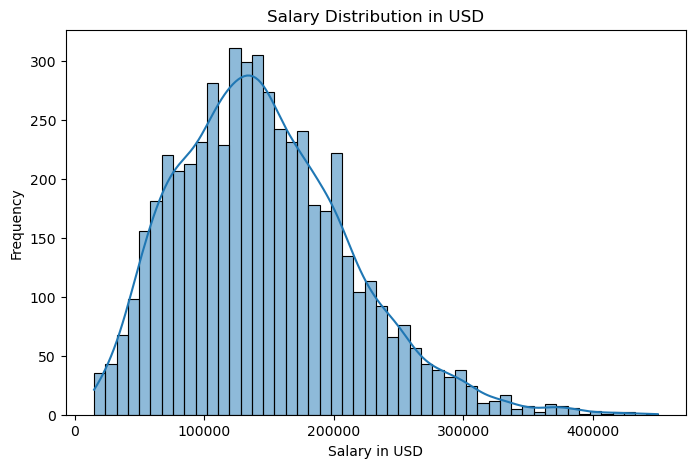

In [25]:
# Plot salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title("Salary Distribution in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()


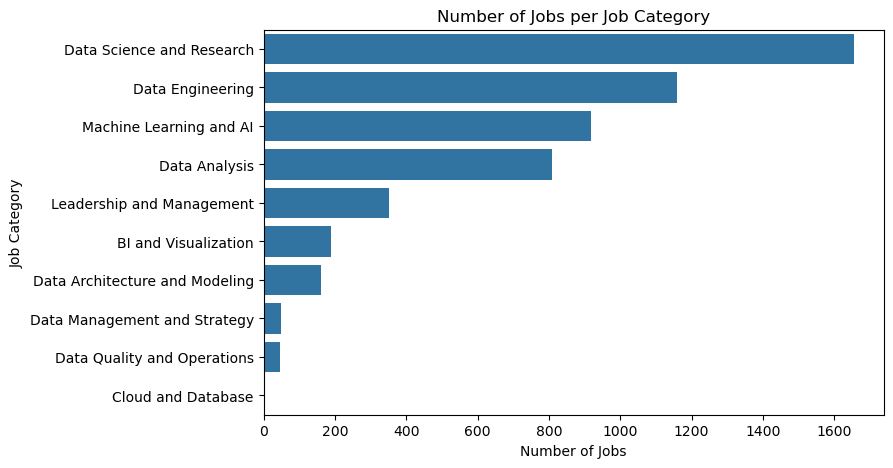

In [26]:
# Plot the number of jobs per job category
plt.figure(figsize=(8, 5))
sns.countplot(y='job_category', data=df, order = df['job_category'].value_counts().index)
plt.title("Number of Jobs per Job Category")
plt.xlabel("Number of Jobs")
plt.ylabel("Job Category")
plt.show()

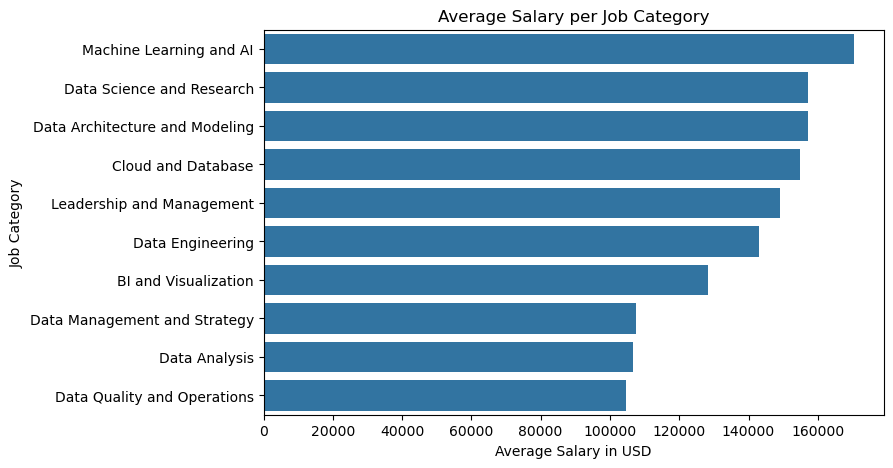

In [28]:
# Compute average salary per job category
avg_salary_per_job_category = df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_per_job_category, y=avg_salary_per_job_category.index)
plt.title("Average Salary per Job Category")
plt.xlabel("Average Salary in USD")
plt.ylabel("Job Category")
plt.show()


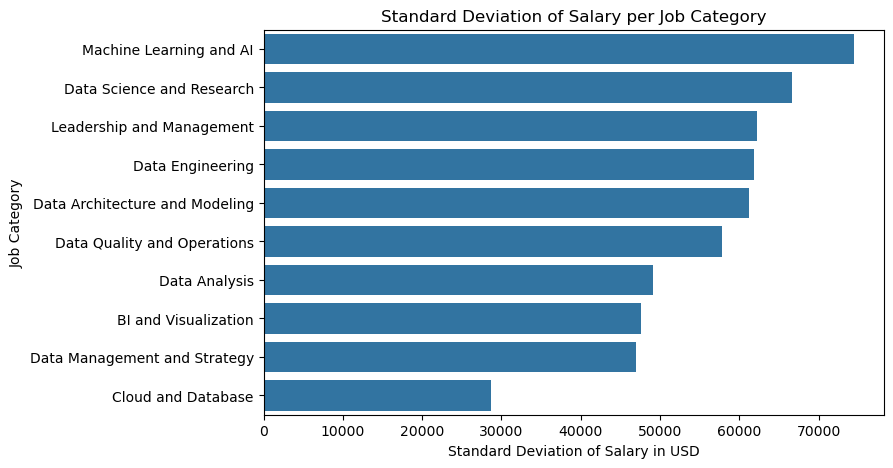

In [29]:
# Compute the standard deviation of salary per job category
std_salary_per_job_category = df.groupby('job_category')['salary_in_usd'].std().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=std_salary_per_job_category, y=std_salary_per_job_category.index)
plt.title("Standard Deviation of Salary per Job Category")
plt.xlabel("Standard Deviation of Salary in USD")
plt.ylabel("Job Category")
plt.show()


/var/folders/yz/866vy1gx1c57kx29q4dcq70c0000gn/T/ipykernel_64582/173288903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="job_category", y="salary_in_usd", data=df, palette="coolwarm")


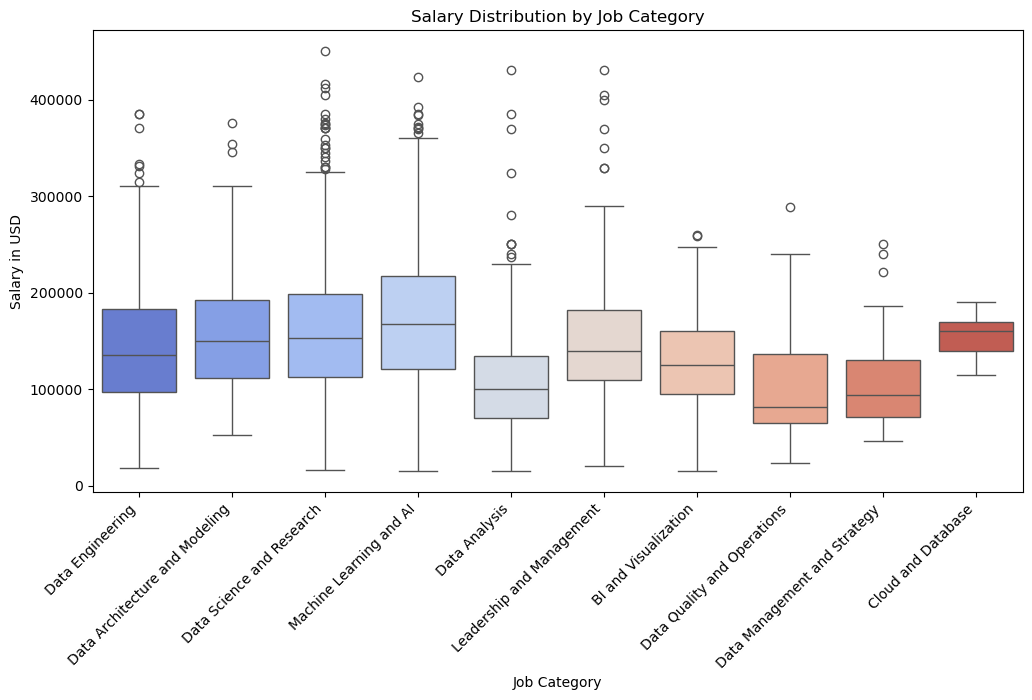

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="job_category", y="salary_in_usd", data=df, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Category")
plt.ylabel("Salary in USD")
plt.title("Salary Distribution by Job Category")
plt.show()


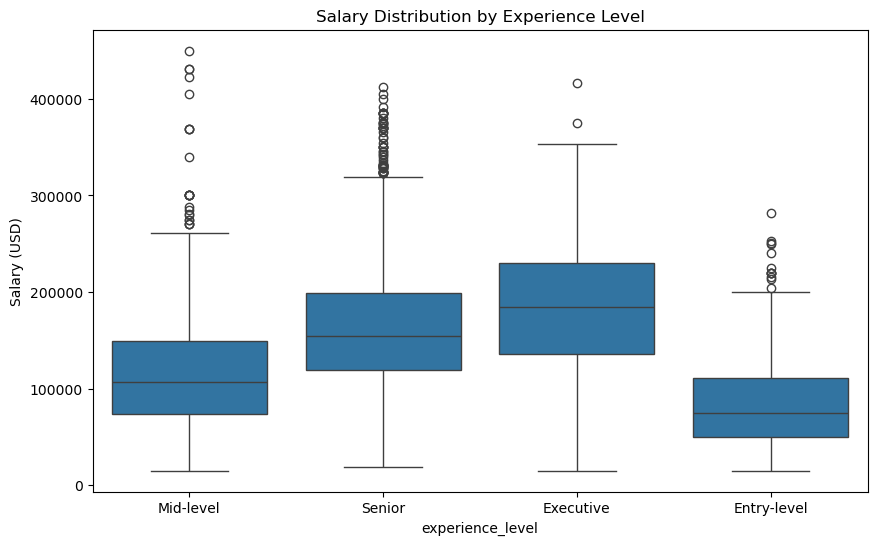

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Salary (USD)')
plt.show()


In [61]:
# Compute the correlation  between salary and experience level by converting the experience level to a numerical value in a new column
df['experience_level_cat'] = df['experience_level']
df['experience_level_cat'].replace({'Entry-level': 0, 'Mid-level': 1, 'Senior': 2, 'Executive':3}, inplace=True)
correlation = df['salary_in_usd'].corr(df['experience_level_cat'])
print(f"Correlation between Salary and Experience Level: {correlation:.2f}")



Correlation between Salary and Experience Level: 0.40


/var/folders/yz/866vy1gx1c57kx29q4dcq70c0000gn/T/ipykernel_64582/2897819177.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience_level_cat'].replace({'Entry-level': 0, 'Mid-level': 1, 'Senior': 2, 'Executive':3}, inplace=True)
/var/folders/yz/866vy1gx1c57kx29q4dcq70c0000gn/T/ipykernel_64582/2897819177.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future b

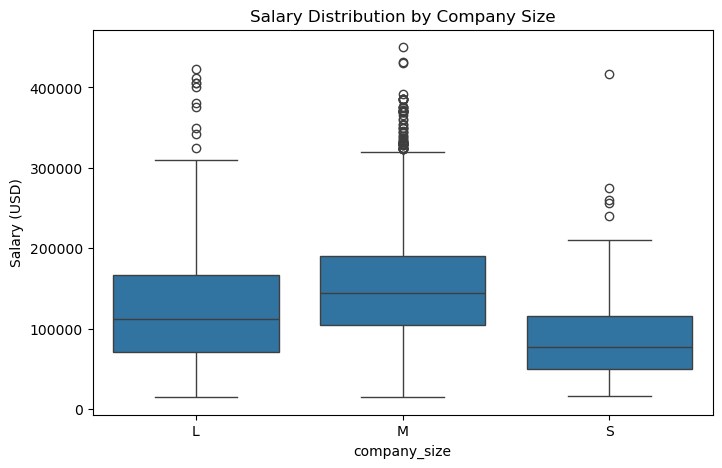

In [39]:
# Boxplot to show salary distribution across company sizes
plt.figure(figsize=(8, 5))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')
plt.ylabel('Salary (USD)')
plt.show()
